In [23]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [25]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [26]:
# Image redimension for CNN
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

In [27]:
# Split the set between training and validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=42) # 25% validation

In [28]:
# Adjusting proportions
x_train, x_temp, y_train, y_temp = train_test_split(x_train, y_train, test_size=1/3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [29]:
print("TRAINING SET:", x_train.shape, y_train.shape)
print("VALIDATION SET:", x_val.shape, y_val.shape)
print("TEST SET:", x_test.shape, y_test.shape)

TRAINING SET: (30000, 28, 28, 1) (30000,)
VALIDATION SET: (7500, 28, 28, 1) (7500,)
TEST SET: (7500, 28, 28, 1) (7500,)


**x_train, y_train**: Conjuntos para treinar modelo de rede neural.
<br>
**x_val, y_val**: Conjuntos para monitorar o desempenho do modelo durante o treinamento e ajustar os hiperparâmetros.
<br>
**x_test, y_test**: Conjuntos para avaliar o desempenho final do modelo após o treinamento.

In [30]:
# LeNet-5
model = models.Sequential([
    layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(16, kernel_size=(5, 5), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7878 - loss: 0.6556 - val_accuracy: 0.9648 - val_loss: 0.1184
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9655 - loss: 0.1088 - val_accuracy: 0.9728 - val_loss: 0.0856
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9786 - loss: 0.0702 - val_accuracy: 0.9788 - val_loss: 0.0729
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9804 - loss: 0.0561 - val_accuracy: 0.9821 - val_loss: 0.0623
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9870 - loss: 0.0416 - val_accuracy: 0.9811 - val_loss: 0.0643
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9899 - loss: 0.0320 - val_accuracy: 0.9844 - val_loss: 0.0529
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9904 - loss: 0.0260 - val_accuracy: 0.9860 - val_loss: 0.0502
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9923 - loss: 0.0235 - val_accuracy: 0.

In [33]:
# Avaliate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Precisão do teste: {test_acc}')

235/235 - 0s - 2ms/step - accuracy: 0.9861 - loss: 0.0480
Precisão do teste: 0.986133337020874


In [35]:
# generate the matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
conf_matrix = confusion_matrix(y_test, y_pred_classes)

235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


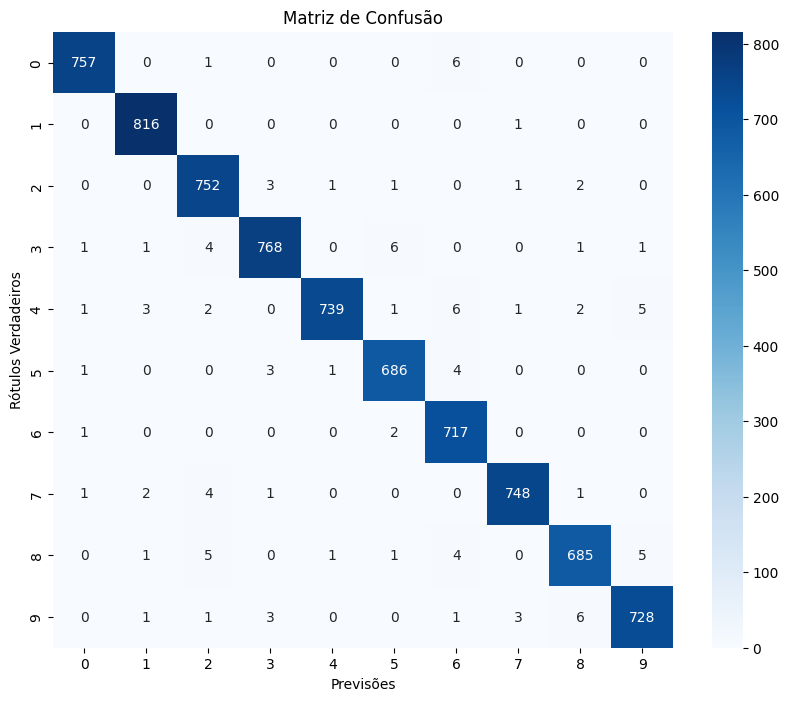

In [36]:
# Visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsões')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()